Working Progress...

Machine Learning with Air BnB Data

In [1]:
import pandas as pd

cleansed_listings_dec18 = pd.read_csv('cleansed_listings_dec18.csv')

cleansed_listings_dec18.head()

C:\Users\ryana\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,77) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,neighborhood_overview,notes,...,review_scores_location,review_scores_value,requires_license,license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,9835,https://www.airbnb.com/rooms/9835,2.018120e+13,12/7/2018,Beautiful Room & House,NaN,"House: Clean, New, Modern, Quite, Safe. 10Km f...","House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,NaN,...,9.0,9.0,f,NaN,f,strict_14_with_grace_period,f,f,1,0.04
1,10803,https://www.airbnb.com/rooms/10803,2.018120e+13,12/7/2018,Room in Cool Deco Apartment in Brunswick,A large air conditioned room with queen spring...,The apartment is Deco/Edwardian in style and h...,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,NaN,...,9.0,9.0,f,NaN,t,moderate,t,t,1,1.50
2,12936,https://www.airbnb.com/rooms/12936,2.018120e+13,12/7/2018,St Kilda 1BR APT+BEACHSIDE+VIEWS+PARKING+WIFI+AC,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,FREE WiFi FREE in-building remote controlled g...,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,First floor apartment with both lift and stair...,...,9.0,9.0,f,NaN,f,strict_14_with_grace_period,f,f,17,0.15
3,15246,https://www.airbnb.com/rooms/15246,2.018120e+13,12/7/2018,Large private room-close to city,"Comfortable, relaxed house, a home away from ...",The atmosphere is relaxed and easy going. You ...,"Comfortable, relaxed house, a home away from ...","This is a great neighbourhood – it is quiet, y...",A simple self service breakfast is available –...,...,9.0,9.0,f,NaN,f,moderate,f,f,3,0.30
4,16760,https://www.airbnb.com/rooms/16760,2.018120e+13,12/7/2018,Melbourne BnB near City & Sports,NaN,We offer comfortable accommodation in Inner Me...,We offer comfortable accommodation in Inner Me...,NaN,NaN,...,10.0,9.0,f,NaN,f,moderate,f,f,1,0.74


In [2]:
cleansed_listings_dec18.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'neighborhood_overview', 'notes', 'transit',
       'access', 'interaction', 'house_rules', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighborhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 

In [3]:
df = cleansed_listings_dec18[['id', 'suburb', 'bed_type', 'bathrooms', 'price', 'minimum_nights', 'maximum_nights',
                               'review_scores_cleanliness','review_scores_checkin','review_scores_communication',
                              'review_scores_location','number_of_reviews', 'review_scores_rating']]

df = df[df.review_scores_rating > 0]
df.fillna(0, inplace=True)

X = ['bathrooms', 'price', 'minimum_nights', 'maximum_nights',
    'review_scores_cleanliness','review_scores_checkin','review_scores_communication',
    'review_scores_location','number_of_reviews']

df.head()

,id,suburb,bed_type,bathrooms,price,minimum_nights,maximum_nights,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,number_of_reviews,review_scores_rating
0,9835,Bulleen,Real Bed,1.0,60,1,365,10.0,10.0,10.0,9.0,4,90.0
1,10803,Brunswick East,Futon,1.0,35,3,45,8.0,9.0,9.0,9.0,108,87.0
2,12936,St Kilda,Real Bed,1.0,159,3,28,10.0,9.0,9.0,9.0,15,94.0
3,15246,Thornbury,Real Bed,1.5,50,2,200,9.0,10.0,10.0,9.0,29,94.0
4,16760,St Kilda East,Real Bed,1.0,69,1,90,9.0,10.0,10.0,10.0,63,90.0


In [4]:
len(df), df['id'].nunique()

(17189, 17189)

In [5]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [6]:
len(train), len(test)

(13751, 3438)

In [7]:
train_Y = train['review_scores_rating']
train_X = train[X]
test_Y = test['review_scores_rating']
test_X = test[X]

In [8]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(train_X, train_Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

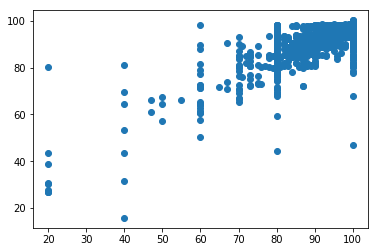

In [9]:
import matplotlib.pyplot as plt   
%matplotlib inline


Prediction = regressor.predict(test_X)

plt.scatter(test_Y, Prediction)

In [10]:
test_Y[0], Prediction[0]

(90.0, 97.89461446805309)

In [11]:
import numpy as np
#mean square error

np.mean((Prediction-test_Y)**2)


22.774456442361373